In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Dataset source
# https://www.kaggle.com/datasets/donw385/horses
df = pd.read_csv("/kaggle/input/horses/horses 2.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (25,26,32,33,38,51,52,53,54,56,57,58,59,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Columns
for col in df.columns:
    print(col)

previous_margin
position
position_again
position_two
margin
bf_odds
bf_odds_two_mins_out
bf_odds_all
vic_tote
vic_tote_two_mins_out
vic_tote_all
nsw_tote
nsw_tote_two_mins_out
nsw_tote_all
nsw_odds
betfair_slope
vic_tote_slope
nsw_tote_slope
nsw_odds_slope
country_code
venue_name
market_id
date
market_name
race_number
condition
weather
runner_id
number
name
runner_name_uuid
barrier
blinkers
emergency
dfs_form_rating
tech_form_rating
total_rating_points
handicap_weight
last_five_starts
penalty
favourite_odds_win
favourite_tote_win
tip_pundit_win
tip_rating_win
tip_12_months_win
tip_recent_win
tip_distance_win
tip_class_win
tip_time_win
tip_overall_win
prize_money
sex
sire
dam
colour
age
jockey
jockey_sex
trainer
form_comment
form_comment_sentiment
last_twenty_starts
class_level
field_strength
days_since_last_run
runs_since_spell
overall_starts
overall_wins
overall_places
track_starts
track_wins
track_places
firm_starts
firm_wins
firm_places
good_starts
good_wins
good_places
dead_starts


In [4]:
# Finding dataset main key - runner_id
for column in df.columns:
    if df[column].nunique() == df[column].count():
        print(f'Unique column - {column}')

Unique column - runner_id


In [5]:
df['overall_wins'].describe()

count    214148.000000
mean          2.083064
std           2.449549
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          36.000000
Name: overall_wins, dtype: float64

In [6]:
# Dropping all columns except 3
# date is a unique value
# overall_places is 

# keep = ['date','overall_places','colour']
# for col in df.columns:
#     if col not in keep:
#         df.drop(col, inplace=True, axis=1)

In [7]:
df.describe()

,previous_margin,position,position_again,position_two,margin,bf_odds,bf_odds_two_mins_out,vic_tote,vic_tote_two_mins_out,nsw_tote,...,class_stronger_places,first_up_starts,first_up_wins,first_up_places,second_up_starts,second_up_wins,second_up_places,track_distance_starts,track_distance_wins,track_distance_places
count,145290.000000,241198.000000,68984.000000,234513.000000,171092.000000,241198.000000,240997.000000,241198.000000,240997.000000,241198.000000,...,213803.000000,214148.000000,214148.000000,214148.000000,214076.000000,214076.000000,214076.000000,213649.000000,213649.000000,213649.000000
mean,4.820105,0.100656,1.945683,5.690981,4.962783,37.044911,31.173106,18.361101,16.966572,18.567087,...,0.802622,3.319611,0.382320,0.740693,2.798684,0.339865,0.667305,1.221115,0.200769,0.348862
std,5.545815,0.300873,0.806069,3.316466,5.720454,62.953861,47.954050,19.671723,17.296365,19.930597,...,1.928756,2.146200,0.671096,0.933681,2.091626,0.613947,0.880804,2.614447,0.617769,0.941683
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.050000,1.060000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000,0.000000,1.000000,3.000000,1.300000,7.000000,6.800000,6.300000,6.400000,6.200000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.600000,0.000000,2.000000,5.000000,3.700000,14.500000,14.000000,11.400000,11.100000,11.500000,...,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.700000,0.000000,3.000000,8.000000,6.900000,36.000000,32.000000,22.400000,20.700000,23.000000,...,1.000000,5.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,99.900000,1.000000,5.000000,23.000000,99.900000,1000.000000,1000.000000,336.100000,301.800000,286.000000,...,28.000000,16.000000,10.000000,8.000000,15.000000,9.000000,7.000000,66.000000,15.000000,23.000000


B
B/BR
BL
BR
BR/BL
CH
GR
GR/B
GR/BL
GR/BR
GR/CH
WH
0         B
1      B/BR
2          
3        BR
4     BR/BL
5        CH
6        GR
7          
8          
9          
10         
11         
Name: colour, dtype: object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


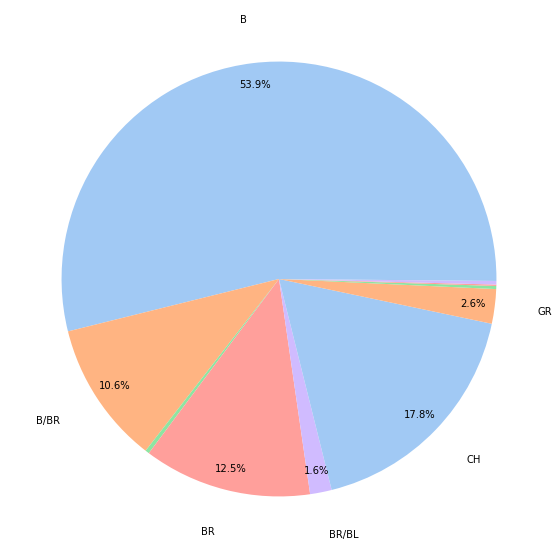

In [8]:
# df[['overall_places','colour']]
#sns.barplot(data=df, x='overall_places', hue='colour')
# sns.displot(data=df, x="overall_places", hue="colour")

sumdf = df.groupby("colour", as_index = False).sum()
#print(sumdf)
labels = sumdf['colour']

# for label in labels:
#     print((sumdf.loc[sumdf['colour'] == label])['overall_wins'])
total = sumdf['overall_wins'].sum()
s= 0 
for i in range(len(labels)):
    print(labels[i])
    count = (sumdf.loc[sumdf['colour'] == labels[i]])['overall_wins']
    percentage = int(count / total * 100)
    if percentage < 1:
        labels[i] = ''
print(labels)
def my_fmt(x):
    if x > 1: return '{:.1f}%'.format(x)
    else: return ""

#print(total)

#print(labels)
colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(figsize=(10,10))
plt.pie(sumdf['overall_wins'], colors = colors, labels=labels, autopct=my_fmt , pctdistance=0.9, labeldistance=1.2)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')

plt.show()


In [9]:
print(ax.get_xticklabels())


[]


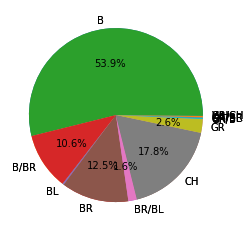

In [10]:
colour_df = df.groupby("colour", as_index = False).sum()
labels = colour_df['colour']

# Create the pie chart
plt.pie(x=sumdf['overall_wins'], labels=labels)

# Get the current axis
ax = plt.gca()

# Get the percentage values for each slice of the pie
values = ax.pie(x=sumdf['overall_wins'], labels=labels, autopct='%1.1f%%')[2]

# Iterate over the percentage values and only display those that are greater than or equal to 1%
for value in values:
    if float(value.get_text().strip('%')) < 1:
        value.set_text('')

# Show the plot
plt.show()